# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=200></center>

The dataset used for this analysis was scraped from nextspaceflight.com and includes all space missions between 1957 to present time. Please note data preprocessing has already been performed and methodologies have been documented on 'Preprocessing.ipynb'
- I want to explore how the mission details changed over time and answer questions with the insights gained from analyzing this dataset

### Install package with country codes

In [32]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [33]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import iso3166
%matplotlib inline

### Load the data

In [34]:
df = pd.read_csv('cleanLaunchData.csv')

### Preliminary Data Exploration

(No need to clean the dataset since it was alread processed using PreProcessing.ipynb)

In [35]:
df.head(1)

,mission,time,location,rocket,result,organization,status,price,liftoff thrust,payload to LEO,Payload to GTO,Stages,Strap-ons,Rocket Height,Fairing Diameter,Fairing Height,year
0,Iridium-6 & GRACE-FO,2018-05-22 19:47:00+00:00,"SLC-4E, Vandenberg SFB, California, USA",Falcon 9 Block 4,Success,SpaceX,Retired,62000000.0,6804.0,22800.0,8300.0,2.0,0.0,70.0,5.2,13.0,2018


In [36]:
df.describe()

,price,liftoff thrust,payload to LEO,Payload to GTO,Stages,Strap-ons,Rocket Height,Fairing Diameter,Fairing Height,year
count,6.107000e+03,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000
mean,1.622906e+08,5325.710447,8417.561919,1978.013016,2.810545,2.123956,45.252049,3.125353,10.064185,1991.376290
std,2.850611e+08,5152.652485,9686.780008,2844.735485,0.742448,2.320855,11.964466,0.911966,4.183693,18.000188
min,2.500000e+06,133.000000,0.000000,0.000000,1.000000,0.000000,9.540000,0.500000,1.000000,1964.000000
25%,2.000000e+07,2962.000000,3300.000000,0.000000,2.000000,0.000000,38.100000,2.580000,7.140000,1976.000000
50%,6.468000e+07,4456.000000,6860.000000,662.094737,3.000000,2.000000,44.630000,3.000000,9.540000,1988.000000
75%,1.259403e+08,5885.000000,9797.000000,3000.000000,3.000000,4.000000,51.380000,3.800000,13.000000,2008.000000
max,3.000000e+09,45307.000000,140000.000000,40000.000000,5.000000,9.000000,110.600000,5.920000,43.720000,2023.000000


### Number of launches each year

In [37]:
# 2023 missions have been removed since it is partial data
df = df[df['year']<2023]

Text(0.5, 1.0, 'Launches over time')

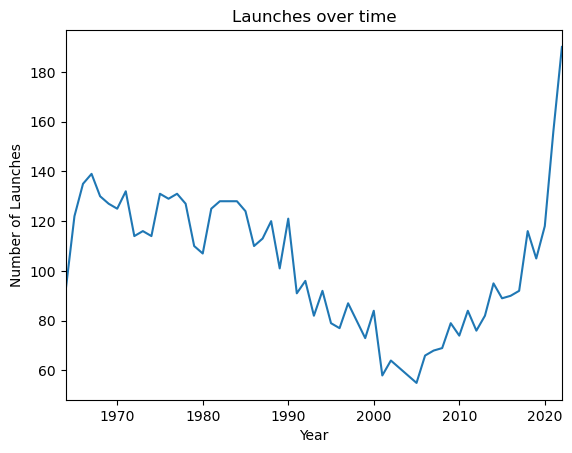

In [38]:
mis_per_yr = df.groupby('year')['mission'].count()
plt.plot(mis_per_yr.index, mis_per_yr.values)

plt.xlim([1964, 2022])
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.title("Launches over time")

As shown in the chart above, there is a clear downward trend of total launches between 1970 up until the mid 2000's where a upward trend appears. It is also important to note the number of missions has skyrocketed between 2020 and 2022, with 2022 showing the highest number of launches in recorded history. 

### Success vs. Failure

Next, I will explore the outcome of the missions for each year. For the purpose of this analysis, partial and prelaunch failures will be classified as a full failure. I have added a new column called 'outcome_cat' that categorizes a success as 1 and failure as 0.

In [39]:
df['outcome_cat'] = df['result'].apply(lambda x:0 if 'Failure' in x else 1)

In [40]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# number of success per year
num_succ=df[df['outcome_cat']==1].groupby('year').count()['outcome_cat']

# number of fail per year
num_fail=df[df['outcome_cat']==0].groupby('year').count()['outcome_cat']


fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.09,
                   subplot_titles=("Success","Failure"))

fig.add_trace(go.Scatter(x=num_succ.index, y=num_succ.values),
              row=1, col=1)

fig.add_trace(go.Scatter(x=num_fail.index, y=num_fail.values),
              row=2, col=1)
# fig = px.line(num_succ, x=num_succ.index, y=num_succ.values, title = 'success rate')
fig.show('png')

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


The chart above shows the total number of failures and successes in any given year. At a glance, it shows the number of failed launches are correlated with the total number of launches. Next I want to determine the ratio of success to failure per year

### Outcome ratio

In [ ]:
ratio=pd.concat([num_fail, num_succ], axis=1)
ratio.columns = ['fail', 'success']
ratio["success_rate"] = ratio['success']/(ratio['success']+ratio['fail'])

ratio['SMA30'] = ratio['success_rate'].rolling(8).mean()

# set figure size
plt.figure(figsize=(9,6))
# Time series plot with Seaborn lineplot() with label
sns.lineplot(x=ratio.index,y="success_rate",
             label="yearly", data=ratio,
             ci=None)
# 10 year rolling average Time series plot with Seaborn lineplot() with label
sns.lineplot(x=ratio.index,y="SMA30",
             label="8 year moving avg",
             data=ratio,
             ci=None)
# set axis labels
plt.xlabel("Date", size=14)
plt.ylabel("Success rate", size=14)


The chart above shows the yearly average success rate, as well as the 8 year rolling average. The trend depicts a general increasing success rate over time. The orange line represents a simple 8 year moving average to get a more clear picture of the trend. This chart can back the claim that organizations have generally gotten better at minimising risk and improving their chances at a favorable mission outcome over time. 

### Which organization has had the most launches


In [ ]:
df.groupby('organization').count()['mission'].sort_values(ascending=False).head()

The USSR has had just under 2389 launches, 5 times as many as the runner up, CASC! To follow up it would be interesting to see which organizations spent the most money on missions

In [ ]:
df.groupby('organization').sum()['price'].sort_values(ascending=False).head()

The USSR spent nearly 500 billion usd total on space missions, nearly quintuple the US Air Force budget which comes in at second. This makes sense when considering the number of missions launched by the USSR

### How expensive was each mission

In [ ]:
fig = px.histogram(df, x="price")
fig.show('png')

The histogram shows that most missions were priced within 10mil - 150mil but there are 2 missions that cost around 3 billion usd! These 2 missions were launched by the USSR in the late 1980's, during the cold war.

In [ ]:
df[df['price'] >= 3000000000]

### Mission prices over time

Did the avg cost of a mission go up for down since the start of the dataset

In [ ]:
avg_mission_cost = df.groupby('year').mean()['price']

fig = px.line(avg_mission_cost, x=avg_mission_cost.index, y=avg_mission_cost.values)
fig.show('png')

It looks like the average cost of a mission has remained relatively consistent since the mid 1970's

### Visual of launches by country

In [ ]:
def country(x):
    return x.rsplit(', ',1)[1]

df['country']= df['location'].apply(country)
df['country'].unique()

The countries need to be wrangled to match the country name according to ISO 3166 country codes
* Russia is the Russian Federation
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA

In [ ]:
# create a new column that contains the alpha3 country code that adheres to ISO 3166 guidelines

def country1(x):
    if 'Russia'in x or 'Barents' in x:
        return 'Russian Federation'
    elif 'Yellow' in x:
        return 'China'
    elif 'Shahrud' in x or 'Iran' in x:
        return 'Iran, Islamic Republic of'
    elif 'Pacific' in x or 'Gran' in x:
        return 'USA'
    elif 'South Korea' in x:
        return 'Korea, Republic of'
    elif 'North Korea' in x:
        return "Korea, Democratic People's Republic of"
    else:
        return x

df['country'] = df['country'].apply(country1)

def iso3(x):
    try:
        return iso3166.countries.get(x).alpha3
    except:
        return x

df['country'] = df['country'].apply(iso3)


In [ ]:
launch_by_country = df.groupby('country').count()['mission']

fig = px.choropleth(launch_by_country, locations=launch_by_country.index,
                    color=launch_by_country.values, # lifeExp is a column of gapminder
                    hover_name=launch_by_country.index, # column to add to hover information
                    color_continuous_scale=px.colors.sequential.matter)
fig.show('png')

The Choropleth map gives a visualization of which countries launched the most missions, painting a more clear picture than if presented on a simple table. The US and Russia dominate the number of missions launched, denoted by the darker color.

### Cold war space race: USA vs. USSR

lets investigate how the 2 superpowers matched up in the space race during the cold war(start of dataset to 1991). 
- First, which country had the most launches year to year? 
- (note launches in Kazakhstan has been counted as part of the USSR since it was a former member)

In [ ]:
def USorUSSR(x):
    if x == 'KAZ' or x == 'RUS':
        return 'USSR'
    elif x == 'USA':
        return 'US'
    else:
        return 'None'

df['USorUSSR'] = df['country'].apply(USorUSSR)

In [ ]:
superp = df[(df['USorUSSR']== 'US')|(df['USorUSSR'] == 'USSR')]
superp = superp[superp['year'] < 1992]

total = (superp.groupby(['year', 'USorUSSR']).count()['mission']).reset_index()

In [ ]:
fig = px.line(total, x='year', y="mission", color='USorUSSR').update_layout(
    xaxis_title="Year", yaxis_title="Total Missions")
fig.show('png')

The line graph shows that in terms of sheer number of missions to space, the USSR wins by a large margin. 
- next, lets see who wins the highest mission success ratio

In [ ]:
my_df = (superp.groupby(['year', 'USorUSSR', 'outcome_cat']).count()['mission']).reset_index()
my_df1 = (my_df.pivot(index=["year", "USorUSSR"], columns=['outcome_cat'],values="mission")).reset_index()
my_df1['success_rate1'] = my_df1[1]/(my_df1[1]+my_df1[0])
my_df1 = my_df1.dropna()

In [ ]:
fig = px.line(my_df1, x='year', y="success_rate1", color='USorUSSR')
fig.show('png')

As shown on the graph, the USSR also consistently performs better in terms of success ratio after ~1977. Since it appears the USSR wins in both number of missions launched as well as success ratio, does the total monetary investment reflect this trend?:
- how much did the 2 superpowers invest in the space race? Is there a correlation to spending more and having more launches/ succesful launches?

In [ ]:
price_per_year = (superp.groupby(['year','USorUSSR']).sum()['price']).reset_index()

fig = px.line(price_per_year, x='year', y="price", color='USorUSSR').update_layout(
    xaxis_title="Year", yaxis_title="Total Cost")
fig.show('png')

The graph shows that after 1974, the 2 superpowers had around the same budget to spend on the space race. However, since half of the missions were missing price on the original dataset, the average price of the year was used to substitute the missing cells. We must keep in mind this will lower the variance year to year between the US and USSR so this graph might not be an accurate representation of true cost.